# Project: Wrangling and Analyze Data

## Data Gathering


In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install --upgrade tweepy

In [3]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_pred = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_pred.content)

335079

In [5]:
df_image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')

In [5]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

>after trying to query data via the twitter API getting auth fails over couple of hours i finally downloaded the tweet_json.txt file from the udacity homepage

In [6]:
# read in the tweet_json.txt file line by line 
data = []

for line in open('tweet_json.txt', 'r'):
    twitter_data = json.loads(line)
    data.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})

In [7]:
# Convert the list of dictionaries to a pandas DataFrame
df_twitter_data = pd.DataFrame(data, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

In [8]:
df_twitter_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


## Assessing Data

In [9]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
sum(df_twitter.tweet_id.duplicated())

0

In [11]:
df_twitter.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
Bailey         7
Toby           7
Daisy          7
an             7
Bella          6
Jax            6
Stanley        6
Oscar          6
Milo           6
Dave           6
Koda           6
Scout          6
Rusty          6
Jack           6
Leo            6
Chester        5
            ... 
Arya           1
Noosh          1
Crawford       1
Terrenth       1
Hubertson      1
Napolean       1
Rizzo          1
Trigger        1
Brian          1
Raphael        1
Rinna          1
Tessa          1
Ace            1
Puff           1
Halo           1
Stuart         1
Torque         1
Wishes         1
Arlo           1
Rontu          1
Aubie          1
Willie         1
Eleanor        1
Sky            1
Rorie          1
Murphy         1
light          1
River         

In [4]:
df_twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


### Quality issues

1. get rid of retweets

2. get rid of columns we don't need

3. Wrong Datatype tweet_id

4. Wrong Datatype Timestamp

5. fix source column

6. some entrys are no dogs, breeds are not in the same column

7. capitalization and underscoring issues

8. incorrect dog names

### Tidiness issues

1. merge doggo, floofer, pupper and puppo columns into one column

2. merge all dataframes together

## Cleaning Data


In [16]:
# Make copies of original pieces of data
df_twitter_clean = df_twitter.copy()
df_image_pred_clean = df_image_pred.copy()
df_twitter_data_clean = df_twitter_data.copy()

### Issue #1:

#### Define: 
get rid of retweets ->
Deleting retweets / keeping original tweets "using retweeted_status_user_id"

#### Code

In [17]:
# Deleting retweets / keeping original tweets "using retweeted_status_user_id"
df_twitter_clean = df_twitter_clean[pd.isnull(df_twitter_clean['retweeted_status_user_id'])]

#### Test

In [18]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2:

#### Define
get rid of columns we don't need by droping them

#### Code

In [19]:
df_twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [20]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #3:

#### Define
Wrong Datatype tweet_id column in all table -> changing it to "str" datatyp

#### Code

In [21]:
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype(str)
df_image_pred_clean['tweet_id'] = df_image_pred_clean['tweet_id'].astype(str)
df_twitter_data_clean['tweet_id'] = df_twitter_data_clean['tweet_id'].astype(str)

#### Test

In [22]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(2), object(9)
memory usage: 203.9+ KB


### Issue #4:

#### Define
Wrong Datatype timestamp column in the df_twitter_clean table -> changing it to "datetime" datatyp

#### Code

In [23]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])

#### Test

In [24]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


### Issue #5:

#### Define
fixing source column by replacing the url with app name

#### Code

In [25]:
df_twitter_clean.source = df_twitter_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_twitter_clean.source = df_twitter_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
df_twitter_clean.source = df_twitter_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_twitter_clean.source = df_twitter_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [26]:
df_twitter_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #6:

#### Define
moving the dog breeds in a single column called dog_breed and dropping the not a dog rows

#### Code

In [27]:
breed = []

def image_pred(df_image_pred_clean):
    if df_image_pred_clean.p1_dog == True:
        breed.append(df_image_pred_clean.p1)
    elif df_image_pred_clean.p2_dog == True:
        breed.append(df_image_pred_clean.p2)
    elif df_image_pred_clean.p3_dog == True:
        breed.append(df_image_pred_clean.p3)
    else:
        breed.append('not a dog')

        
df_image_pred_clean.apply(image_pred, axis=1)
  
df_image_pred_clean['dog_breed'] = breed

df_image_pred_clean = df_image_pred_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)
df_image_pred_clean.drop(df_image_pred_clean.loc[df_image_pred_clean['dog_breed']=='not a dog'].index, inplace=True)

#### Test

In [28]:
df_image_pred_clean.dog_breed.value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
cocker_spaniel                     34
malamute                           34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
beagle                             21
German_shepherd                    21
Shih-Tzu                           20
Siberian_husky                     20
kuvasz                             19
Lakeland_terrier                   19
Shetland_sheepdog                  19
Rottweiler                         19
Maltese_dog                        19
Italian_grey

In [29]:
df_image_pred_clean.head()

,tweet_id,jpg_url,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


### Issue #7:

#### Define
removing underscore in dog_breed column by replacing "_" with " "
geting each word in capital letters by using the str.title() method

#### Code

In [30]:
df_image_pred_clean.dog_breed = df_image_pred_clean.dog_breed.str.replace('_',' ')
df_image_pred_clean.dog_breed = df_image_pred_clean.dog_breed.str.title()

#### Test

In [31]:
df_image_pred_clean.head()

,tweet_id,jpg_url,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher


In [34]:
df_image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id     1751 non-null object
jpg_url      1751 non-null object
dog_breed    1751 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


### Issue #8:

#### Define
fixing name issues by replacing illogical names with "None"

#### Code

In [48]:
df_twitter_clean.name = df_twitter_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [51]:
df_twitter_clean.name.value_counts()

None         784
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Lola           8
Sadie          8
Winston        8
Daisy          7
Toby           7
Bo             6
Koda           6
Stanley        6
Oscar          6
Jax            6
Bailey         6
Bella          6
Buddy          5
Leo            5
Chester        5
Scout          5
Rusty          5
Louis          5
Bentley        5
Dave           5
Milo           5
Clarence       4
Reggie         4
            ... 
Emanuel        1
Harry          1
Sailer         1
Humphrey       1
Ginger         1
Glacier        1
Lupe           1
Darrel         1
Rooney         1
Lorelei        1
Beebop         1
Seamus         1
Blanket        1
Steve          1
Ron            1
Shooter        1
Farfle         1
Remy           1
Ralphie        1
Sprinkles      1
Kollin         1
Skittles       1
Jangle         1
Herschel       1
Aiden          1
Autumn         1
Ronduh         1
Aja           

### Tidiness Issue #1:

#### Define
melt doggo, floofer, pupper and puppo columns into one column by using the pd.melt method

#### Code

In [35]:
df_twitter_clean = pd.melt(df_twitter_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'var_name', 
                                value_name = 'dog_stage')

  
df_twitter_clean.drop('var_name', 1, inplace = True)

df_twitter_clean = df_twitter_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [36]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 152.9+ KB


In [37]:
df_twitter_clean.dog_stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

### Tidiness Issue #2:

#### Define
merge all dataframes together using the tweet_id as a key

#### Code

In [52]:
df_clean = pd.merge(df_twitter_clean, df_twitter_data_clean, how='left', on='tweet_id')
df_clean = pd.merge(df_twitter_clean, df_image_pred_clean, how='left', on='tweet_id')

#### Test

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
jpg_url               1686 non-null object
dog_breed             1686 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 186.9+ KB


In [53]:
#dropping all empty url rows
df_clean.dropna(axis = 0, inplace=True)

In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2174
Data columns (total 10 columns):
tweet_id              1686 non-null object
timestamp             1686 non-null datetime64[ns]
source                1686 non-null object
text                  1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
dog_stage             1686 non-null object
jpg_url               1686 non-null object
dog_breed             1686 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 144.9+ KB


In [56]:
df_clean.name.value_counts()

None         499
Lucy          10
Cooper        10
Charlie       10
Oliver         9
Tucker         9
Penny          8
Sadie          7
Winston        7
Daisy          7
Jax            6
Lola           6
Koda           6
Toby           6
Bo             5
Stanley        5
Leo            5
Rusty          5
Oscar          5
Bella          5
Louis          4
Sophie         4
Reggie         4
Scout          4
Alfie          4
Duke           4
Brody          4
Oakley         4
Scooter        4
Larry          4
            ... 
Kona           1
Atticus        1
Taco           1
Lolo           1
Rubio          1
BeBe           1
Ronduh         1
Aiden          1
Brat           1
Jangle         1
Stephanus      1
Ebby           1
Richie         1
Binky          1
Tango          1
Ike            1
Alexander      1
Lorelei        1
Beebop         1
Miguel         1
Steve          1
Ron            1
Shooter        1
Jerry          1
Remy           1
Ralphie        1
Sprinkles      1
Kollin        

## Storing Data


In [57]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data


In [3]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [59]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 10 columns):
tweet_id              1686 non-null int64
timestamp             1686 non-null object
source                1686 non-null object
text                  1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
dog_stage             1686 non-null object
jpg_url               1686 non-null object
dog_breed             1686 non-null object
dtypes: int64(3), object(7)
memory usage: 131.8+ KB


### Insights 1: Most popular tweeted dog breed

In [61]:
twitter_archive_master.dog_breed.value_counts()

Golden Retriever                  158
Labrador Retriever                108
Pembroke                           95
Chihuahua                          91
Pug                                62
Toy Poodle                         51
Chow                               48
Samoyed                            42
Pomeranian                         42
Malamute                           33
Chesapeake Bay Retriever           31
French Bulldog                     31
Cocker Spaniel                     30
Miniature Pinscher                 25
Eskimo Dog                         22
Staffordshire Bullterrier          21
Cardigan                           21
German Shepherd                    21
Siberian Husky                     20
Beagle                             20
Shih-Tzu                           20
Rottweiler                         19
Shetland Sheepdog                  19
Maltese Dog                        19
Lakeland Terrier                   18
Kuvasz                             18
Italian Grey

In [6]:
twitter_archive_master.dog_breed.nunique()

113

In [8]:
twitter_archive_master.dog_breed.value_counts(normalize=True)[:5]

Golden Retriever      0.093713
Labrador Retriever    0.064057
Pembroke              0.056346
Chihuahua             0.053974
Pug                   0.036773
Name: dog_breed, dtype: float64

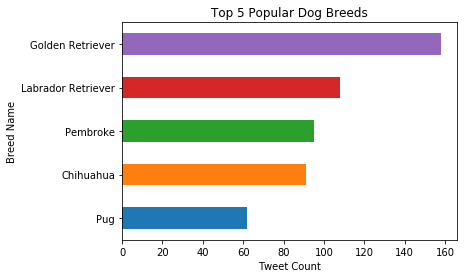

In [147]:
# Bar chart for top 5 popular tweeted breeds
twitter_archive_master.dog_breed.value_counts()[4::-1].plot(kind = 'barh', title = 'Top 5 Popular Dog Breeds')
plt.xlabel('Tweet Count')
plt.ylabel('Breed Name');

The most tweeted dog breed is Golden Retriever with 158 tweets followed by Labrador Retriever (108 tweets) and Pembroke (95 tweets).

### Insights 2: Which dog name is the most popular?

In [111]:
twitter_archive_master.name.value_counts()

None         499
Lucy          10
Cooper        10
Charlie       10
Oliver         9
Tucker         9
Penny          8
Sadie          7
Winston        7
Daisy          7
Jax            6
Lola           6
Koda           6
Toby           6
Bo             5
Stanley        5
Leo            5
Rusty          5
Oscar          5
Bella          5
Louis          4
Sophie         4
Reggie         4
Scout          4
Alfie          4
Duke           4
Brody          4
Oakley         4
Scooter        4
Larry          4
            ... 
Kona           1
Atticus        1
Taco           1
Lolo           1
Rubio          1
BeBe           1
Ronduh         1
Aiden          1
Brat           1
Jangle         1
Stephanus      1
Ebby           1
Richie         1
Binky          1
Tango          1
Ike            1
Alexander      1
Lorelei        1
Beebop         1
Miguel         1
Steve          1
Ron            1
Shooter        1
Jerry          1
Remy           1
Ralphie        1
Sprinkles      1
Kollin        

In [4]:
dog_names = twitter_archive_master.copy()
dog_names.drop(twitter_archive_master.loc[twitter_archive_master['name']=='None'].index, inplace=True)

In [142]:
dog_names.name.value_counts()[:5]

Lucy       10
Charlie    10
Cooper     10
Oliver      9
Tucker      9
Name: name, dtype: int64

In [5]:
dog_names.name.nunique()

833

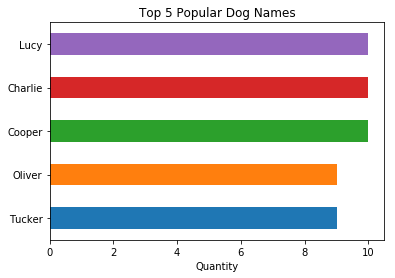

In [146]:
# Bar chart for top 5 popular dog names
dog_names.name.value_counts()[4::-1].plot(kind = 'barh', title = 'Top 5 Popular Dog Names')
plt.xlabel('Quantity');

The most popular tweeted dog name is Lucy, Charlie and Cooper with 10, followed by Oliver and Tucker with 9 tweets.   

### Insights 3: Which source is the most used one?

In [139]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1655
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

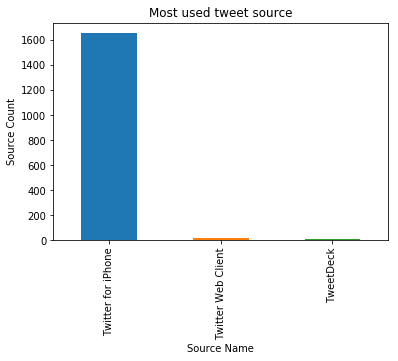

In [151]:
# Bar chart for most used tweet source
twitter_archive_master.source.value_counts().plot(kind = 'bar', title = 'Most used tweet source')
plt.ylabel('Source Count')
plt.xlabel('Source Name');

In [107]:
twitter_archive_master.source.value_counts(normalize=True)

Twitter for iPhone    0.981613
Twitter Web Client    0.013049
TweetDeck             0.005338
Name: source, dtype: float64

The most used source is the Twitter for iPhone app with 1655 tweets, that's over 98%.